# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

In [1]:
# Import all Libraries
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')

## Step 1 - Loading the Dataset

In [2]:
pwd # find my current directory

'C:\\Users\\BOSS'

In [3]:
os.chdir("C:/Users/BOSS/Data-Analysis-Project-main") # load my current working directory

In [4]:
# find all file in current working directory with '.csv'
extension = '.csv'
all_filenames=[i for i in glob.glob(f"*{extension}")]
print(all_filenames)

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']


In [5]:
# concatenate all files found in current working directory
combined_df=pd.concat([pd.read_csv(file) for file in all_filenames])

In [6]:
os.chdir('..') # take me back to my previous working directory

In [7]:
pwd # current working directory

'C:\\Users\\BOSS'

In [8]:
# save the concatenated files to csv
combined_df.to_csv('Company_xyz.csv')

In [9]:
# read the dataframe 
df=pd.read_csv('Company_xyz.csv')
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


## Step 2 - DATA EXPLORATION

In [10]:
# check the shape of the dataframe
print('The shape of the dataframe :{}'.format(df.shape))

The shape of the dataframe :(1000, 18)


In [11]:
# view all columns of the dataframe
print('The columns of the dataframe :{}'.format(df.columns))

The columns of the dataframe :Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [12]:
# provide statistical summary of dataframe
df.describe()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,166.204000,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,96.337673,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,0.000000,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,83.000000,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,166.000000,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,249.250000,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,339.000000,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


Observations

* the gross income is skewed due to the presence of outliers 
* the cogs is also skewed due to large outlier values in data
* tax (5%) is also skewed due to outliers


In [13]:
# find missing values in dataframe
df.notna()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [14]:
# alternatively
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

Observations

* All Non-null count are the same hence, no null or missing values in dataframe.
* Date and Time Column is an object or string type datatype not datetime

## Step 3 - DATA PRE-PROCESSING

(A.) Format Date and Time column to Datetime datatype

In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               1000 non-null   int64         
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

(B.) Extract Year, Month and Day from Date column and save to new columns respectively. 

In [16]:
df['Year']=df.Date.dt.year
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,...,2019-02-20,2021-04-24 13:27:00,Card,59227.2,4.761905,2961.36,5.9,2019,2,20
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,...,2019-02-06,2021-04-24 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,2019,2,6
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,...,2019-03-09,2021-04-24 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,2019,3,9
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,...,2019-01-15,2021-04-24 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,2019,1,15
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,...,2019-03-11,2021-04-24 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,2019,3,11


(C.) Extract Hour from Time Column and save to a new column 

In [17]:
df['Hour']=df.Time.dt.hour
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,...,2021-04-24 13:27:00,Card,59227.2,4.761905,2961.36,5.9,2019,2,20,13
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,...,2021-04-24 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,2019,2,6,18
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,...,2021-04-24 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,2019,3,9,17
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,...,2021-04-24 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,2019,1,15,16
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,...,2021-04-24 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,2019,3,11,15


## Step 4 - ANALYSIS

### TO DO A-

From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

Also, return an array of the count (frequency) of the unique hours of sales in the supermarket.

In [18]:
df['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [19]:
np.unique(df['Hour'], return_counts=True)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype=int64),
 array([101,  90,  89, 103,  83, 102,  77,  74,  93, 113,  75], dtype=int64))

### TO DO B- 

 (I) I will get a list of Unique categorical columns i.e. columns which are object or string data type


In [20]:
categorical_columns=[col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

(II) I will determine a list of values for the categorical columns.

In [21]:
df['Invoice ID'].unique().tolist()

['692-92-5582',
 '351-62-0822',
 '529-56-3974',
 '299-46-1805',
 '319-50-3348',
 '371-85-5789',
 '273-16-6619',
 '649-29-6775',
 '145-94-9061',
 '871-79-8483',
 '149-71-6266',
 '640-49-2076',
 '777-82-7220',
 '280-35-5823',
 '354-25-5821',
 '132-32-9879',
 '370-41-7321',
 '727-46-3608',
 '669-54-1719',
 '616-24-2851',
 '242-55-6721',
 '347-34-2234',
 '853-23-2453',
 '109-28-2512',
 '510-95-6347',
 '847-38-7188',
 '318-68-5053',
 '152-08-9985',
 '766-85-7061',
 '733-01-9107',
 '716-39-1409',
 '479-26-8945',
 '227-78-1148',
 '291-32-1427',
 '659-65-8956',
 '378-24-2715',
 '219-22-9386',
 '268-27-6179',
 '549-84-7482',
 '191-10-6171',
 '695-51-0018',
 '590-83-4591',
 '241-72-9525',
 '262-47-2794',
 '608-96-3517',
 '279-74-2924',
 '307-85-2293',
 '743-04-1105',
 '423-57-2993',
 '548-46-9322',
 '505-02-0892',
 '316-55-4634',
 '608-27-6295',
 '414-12-7047',
 '895-66-0685',
 '305-14-0245',
 '732-04-5373',
 '284-34-9626',
 '437-58-8131',
 '641-43-2399',
 '542-41-0513',
 '875-46-5808',
 '394-43

In [22]:
df['Branch'].unique().tolist()

['B', 'A', 'C']

In [23]:
df['City'].unique().tolist()

['Abuja', 'Lagos', 'Port Harcourt']

In [24]:
df['Customer type'].unique().tolist()

['Member', 'Normal']

In [25]:
df['Gender'].unique().tolist()

['Female', 'Male']

In [26]:
df['Product line'].unique().tolist()

['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [27]:
df['Payment'].unique().tolist()

['Card', 'Epay', 'Cash']

### TO DO C- 

I will count the values of unique columns of categorical variables.

In [28]:
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [29]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [30]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [31]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [32]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [33]:
df['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

### To Do D- Aggregate Columns by Groupby with sum and mean function.

Using the groupby object, I will display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [34]:
df_sum=df.groupby('City').sum()
df_sum

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,
Abuja,54946,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,670308,665,5068,5029
Lagos,57630,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,686460,688,5232,4987
Port Harcourt,53628,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,662232,640,4956,4894


In [35]:
df_mean=df.groupby('City').mean()
df_mean

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,
Abuja,165.5,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,2019.0,2.003012,15.265060,15.147590
Lagos,169.5,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,2019.0,2.023529,15.388235,14.667647
Port Harcourt,163.5,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,2019.0,1.951220,15.109756,14.920732


In [36]:
df_sum.nlargest(1, 'gross income')

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,
Port Harcourt,53628,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,662232,640,4956,4894


Port Harcout City has the highest total gross income with a value of 1,895,463.54

In [37]:
df_sum.nlargest(1, 'gross margin percentage')

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,
Lagos,57630,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,686460,688,5232,4987


Lagos City has the highest gross margin percentage with a value of 1619.047619

### TO DO E - 

* (a.) I will determine the branch with low mean rating i.e. rating <= 5 



In [38]:
# extract dataframe with rating below or equal to 5
df_rat_low=df[(df['Rating']<=5)]

In [39]:
df_rat_low

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,...,2021-04-24 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,2019,2,6,18
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,...,2021-04-24 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,2019,1,15,16
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,...,2021-04-24 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,2019,3,11,15
6,6,273-16-6619,B,Abuja,Normal,Male,Home and lifestyle,11952.0,2,1195.20,...,2021-04-24 12:20:00,Card,23904.0,4.761905,1195.20,4.4,2019,3,15,12
9,9,871-79-8483,B,Abuja,Normal,Male,Fashion accessories,33886.8,5,8471.70,...,2021-04-24 19:39:00,Card,169434.0,4.761905,8471.70,4.8,2019,2,25,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,286,631-34-1880,C,Port Harcourt,Member,Male,Food and beverages,8751.6,3,1312.74,...,2021-04-24 19:09:00,Card,26254.8,4.761905,1312.74,4.3,2019,1,8,19
961,289,885-56-0389,C,Port Harcourt,Member,Male,Fashion accessories,18846.0,1,942.30,...,2021-04-24 17:49:00,Cash,18846.0,4.761905,942.30,4.0,2019,2,12,17
966,294,781-84-8059,C,Port Harcourt,Normal,Male,Fashion accessories,21866.4,7,7653.24,...,2021-04-24 16:23:00,Epay,153064.8,4.761905,7653.24,5.0,2019,1,18,16
974,302,717-96-4189,C,Port Harcourt,Normal,Female,Electronic accessories,12776.4,6,3832.92,...,2021-04-24 12:40:00,Cash,76658.4,4.761905,3832.92,4.1,2019,2,2,12


In [40]:
df_rat_low.groupby('City').mean()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,
Abuja,165.409091,20181.818182,5.606061,5900.566364,123911.893636,118011.327273,4.761905,5900.566364,4.510606,2019.0,1.984848,16.121212,15.348485
Lagos,183.900000,20402.220000,5.616667,5716.110000,120038.310000,114322.200000,4.761905,5716.110000,4.500000,2019.0,2.083333,15.466667,14.983333
Port Harcourt,163.125000,21137.850000,5.500000,6280.507500,131890.657500,125610.150000,4.761905,6280.507500,4.497917,2019.0,1.979167,14.791667,15.250000


 Abuja has the highest low rating (mean) i.e. ratings <= 5

* (b.) I will determine the branch with high mean rating i.e. rating > 5

In [41]:
# extract dataframe with rating above 5
df_rat_high = df[(df['Rating']> 5 )]

In [42]:
df_rat_high

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,...,2021-04-24 13:27:00,Card,59227.2,4.761905,2961.36,5.9,2019,2,20,13
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,...,2021-04-24 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,2019,3,9,17
5,5,371-85-5789,B,Abuja,Normal,Male,Health and beauty,31672.8,3,4750.92,...,2021-04-24 10:40:00,Epay,95018.4,4.761905,4750.92,5.1,2019,3,5,10
7,7,649-29-6775,B,Abuja,Normal,Male,Fashion accessories,12067.2,1,603.36,...,2021-04-24 15:31:00,Cash,12067.2,4.761905,603.36,6.7,2019,2,8,15
8,8,145-94-9061,B,Abuja,Normal,Female,Food and beverages,31809.6,5,7952.40,...,2021-04-24 19:48:00,Cash,159048.0,4.761905,7952.40,9.6,2019,1,25,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,322,728-47-9078,C,Port Harcourt,Member,Male,Food and beverages,21452.4,4,4290.48,...,2021-04-24 12:46:00,Cash,85809.6,4.761905,4290.48,9.8,2019,1,19,12
995,323,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,...,2021-04-24 10:33:00,Cash,251899.2,4.761905,12594.96,6.1,2019,1,23,10
996,324,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,...,2021-04-24 11:40:00,Cash,242852.4,4.761905,12142.62,6.0,2019,1,9,11
998,326,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,...,2021-04-24 11:40:00,Epay,21942.0,4.761905,1097.10,5.9,2019,2,18,11


In [43]:
df_rat_high.groupby('City').mean()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,
Abuja,165.522556,20001.491729,5.451128,5380.053158,112981.116316,107601.063158,4.761905,5380.053158,7.390602,2019.0,2.007519,15.052632,15.097744
Lagos,166.414286,19575.154286,5.435714,5277.182786,110820.838500,105543.655714,4.761905,5277.182786,7.568571,2019.0,2.010714,15.371429,14.600000
Port Harcourt,163.564286,20249.202857,5.596429,5692.854214,119549.938500,113857.084286,4.761905,5692.854214,7.514286,2019.0,1.946429,15.164286,14.864286


Lagos has the highest high rating (mean)

Overall customer rating for branches of company-xyz

In [44]:
df_mean.nlargest(3, 'Rating')

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,
Port Harcourt,163.5,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,2019.0,1.951220,15.109756,14.920732
Lagos,169.5,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,2019.0,2.023529,15.388235,14.667647
Abuja,165.5,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,2019.0,2.003012,15.265060,15.147590


Port Harcout City has the highest Overall Mean Rating

In [45]:
df_sum.nlargest(3, 'Rating')

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,
Lagos,57630,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,686460,688,5232,4987
Port Harcourt,53628,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,662232,640,4956,4894
Abuja,54946,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,670308,665,5068,5029


Port Harcout Branch has the highest Overall mean rating (rating per unit customer) while
Lagos Branch has the highest Overall Total rating.

## Step 5 - Data Visualization

### TO DO A-

Plot a bar graph showing the City against their 

(a.) total gross margin percentage

(b.) total gross income

(c.) total cogs

(d.) total Ratings

In [46]:
df_sum.reset_index()

,City,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
0,Abuja,54946,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,670308,665,5068,5029
1,Lagos,57630,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,686460,688,5232,4987
2,Port Harcourt,53628,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,662232,640,4956,4894


In [47]:
df_sum.insert(loc=2, column='city', value=('Abuja', 'Lagos', 'Port Harcout'))

In [48]:
df_sum

,Unnamed: 0,Unit price,city,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
City,,,,,,,,,,,,,,
Abuja,54946,6652396.8,Abuja,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,670308,665,5068,5029
Lagos,57630,6705176.4,Lagos,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,686460,688,5232,4987
Port Harcourt,53628,6684393.6,Port Harcout,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,662232,640,4956,4894


Text(0.5, 1.0, 'Total Gross Margin Percentage of Company-xyz Branches \nBetween Jan 2019 and March 2019')

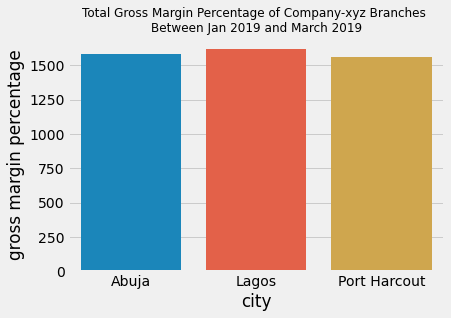

In [49]:
sns.barplot(y='gross margin percentage', x='city', data=df_sum)
plt.title('Total Gross Margin Percentage of Company-xyz Branches \nBetween Jan 2019 and March 2019', {'fontsize':12})

Text(0.5, 1.0, 'Total Gross Income of Company-xyz Branches \nBetween Jan 2019 and March 2019')

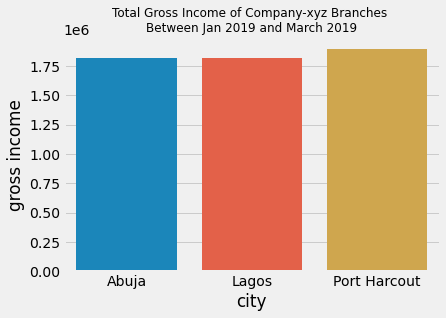

In [50]:
sns.barplot(y='gross income', x='city', data=df_sum)
plt.title('Total Gross Income of Company-xyz Branches \nBetween Jan 2019 and March 2019', {'fontsize':12})

Text(0.5, 1.0, 'Total Cost of goods sold by Company-xyz Branches \nBetween Jan 2019 and March 2019')

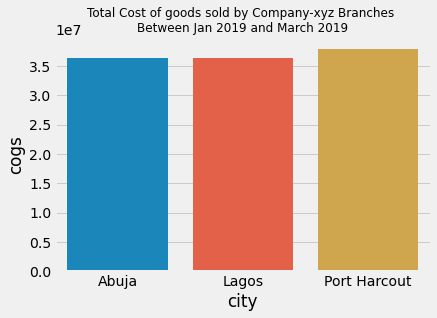

In [51]:
sns.barplot(y='cogs', x='city', data=df_sum)
plt.title('Total Cost of goods sold by Company-xyz Branches \nBetween Jan 2019 and March 2019', {'fontsize':12})

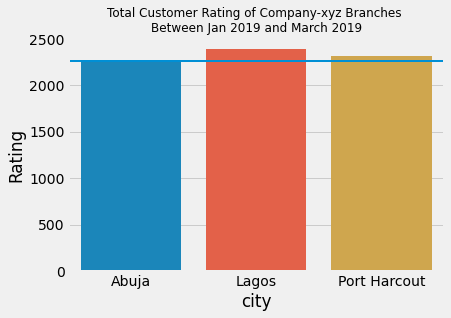

In [52]:
sns.barplot(y='Rating', x='city', data=df_sum)
plt.title('Total Customer Rating of Company-xyz Branches \nBetween Jan 2019 and March 2019', {'fontsize':12})
plt.axhline(y=2263.6, xmin=0, xmax=1, linewidth=2)

### TO DO B -

(a.) I will determine the most used payment method by customers in branches of company-xyz


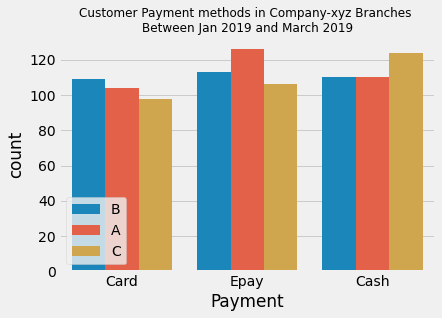

In [53]:
sns.countplot(x='Payment', hue='Branch', data=df)
plt.title('Customer Payment methods in Company-xyz Branches \nBetween Jan 2019 and March 2019', {'fontsize':12})
plt.legend(loc='lower left')

(b.) I will determine the most used branches of company-xyz or branch with the highest sales record

Text(0.5, 1.0, 'Count of Sales Record of the Branches of Company-xyz \nBetween Jan 2019 and March 2019')

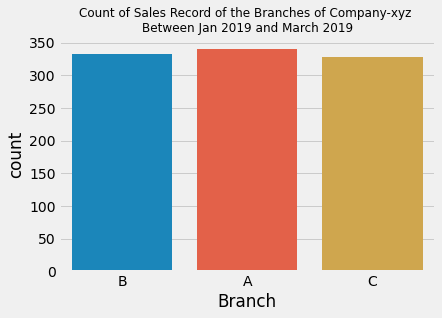

In [54]:
sns.countplot(x='Branch', data=df)
plt.title('Count of Sales Record of the Branches of Company-xyz \nBetween Jan 2019 and March 2019', {'fontsize':12})

(c.) I will make a count of the gender of customer types in company xyz

Text(0.5, 1.0, 'Count of Customer types by Gender for Company-xyz\n Between Jan 2019 and March 2019')

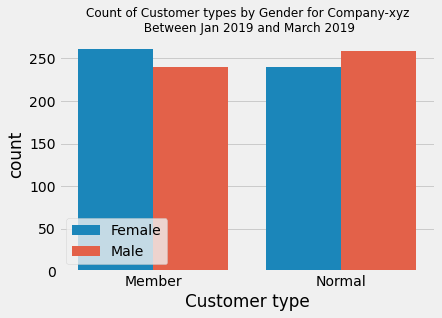

In [55]:
sns.countplot(x='Customer type', hue='Gender', data=df)
plt.legend(loc='lower left')
plt.title('Count of Customer types by Gender for Company-xyz\n Between Jan 2019 and March 2019', {'fontsize':12})

(d.) I will make a count of customer types in branches of company-xyz

Text(0.5, 1.0, 'Count of Customer types in Branches of Company-xyz\n Between Jan 2019 and March 2019')

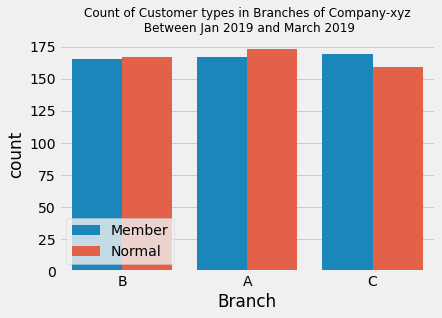

In [56]:
sns.countplot(x='Branch', hue='Customer type', data=df)
plt.legend(loc='lower left')
plt.title('Count of Customer types in Branches of Company-xyz\n Between Jan 2019 and March 2019', {'fontsize':12})

(e.) I will make a count of customer gender in all branches of company-xyz

Text(0.5, 1.0, 'Count of Customer Gender in Branches of Company-xyz\n Between Jan 2019 and March 2019')

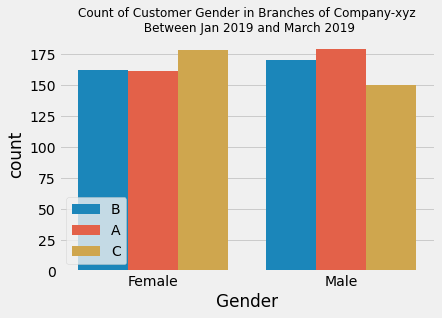

In [57]:
sns.countplot(x='Gender', hue='Branch', data=df)
plt.legend(loc='lower left')
plt.title('Count of Customer Gender in Branches of Company-xyz\n Between Jan 2019 and March 2019', {'fontsize':12})

### TO DO C -

(a.) I will the determine the highest and lowest product line sold in company-xyz

Text(0.5, 1.0, 'Product Line Sales Record by Company-xyz Between Jan 2019 and March 2019')

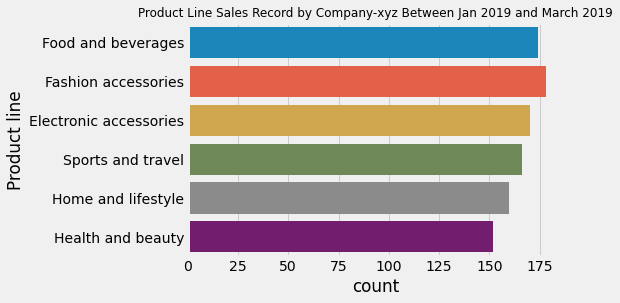

In [58]:
sns.countplot(y='Product line', data=df)
plt.title('Product Line Sales Record by Company-xyz Between Jan 2019 and March 2019', {'fontsize': 12})

(b.) I will determine the Count of Product line sold by branches of company-xyz

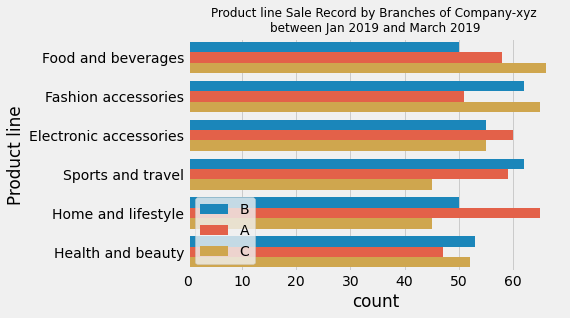

In [59]:
sns.countplot(y='Product line', hue='Branch', data=df)
plt.title('Product line Sale Record by Branches of Company-xyz \nbetween Jan 2019 and March 2019', {'fontsize': 12})
plt.legend(loc='lower left')

### TO DO D - 

describe the ratings of company-xyz using a Box plot

Text(0.5, 1.0, 'Rating of Company-xyz Branches Between \nJan 2019 and March 2019')

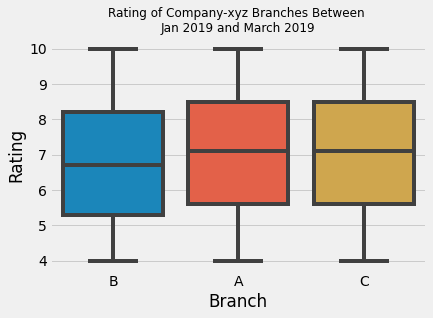

In [60]:
sns.boxplot(x='Branch', y= 'Rating', data=df)
plt.title('Rating of Company-xyz Branches Between \nJan 2019 and March 2019', {'fontsize': 12})

### TO DO E-

I will determine the effect of Gender on Productline sold by plotting Product line against Quantity and Hue it using Gender

Text(0.5, 1.0, 'Product Line and Quantity of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019')

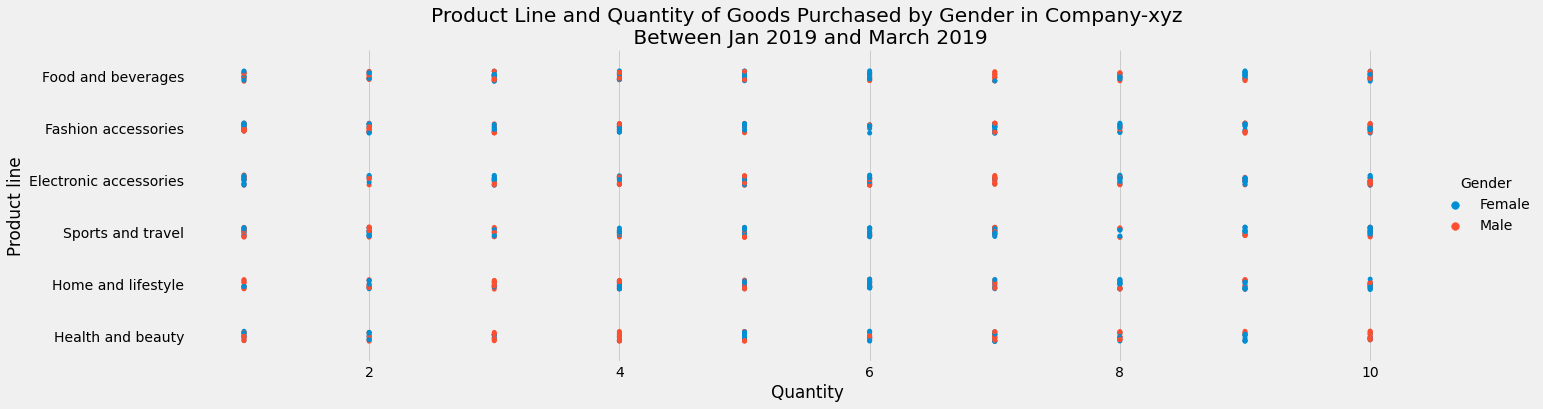

In [61]:
sns.catplot(y='Product line', x='Quantity', hue='Gender', aspect=4, data=df)
plt.title('Product Line and Quantity of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019')

Text(0.5, 1.0, 'Product Line and Total Price of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019')

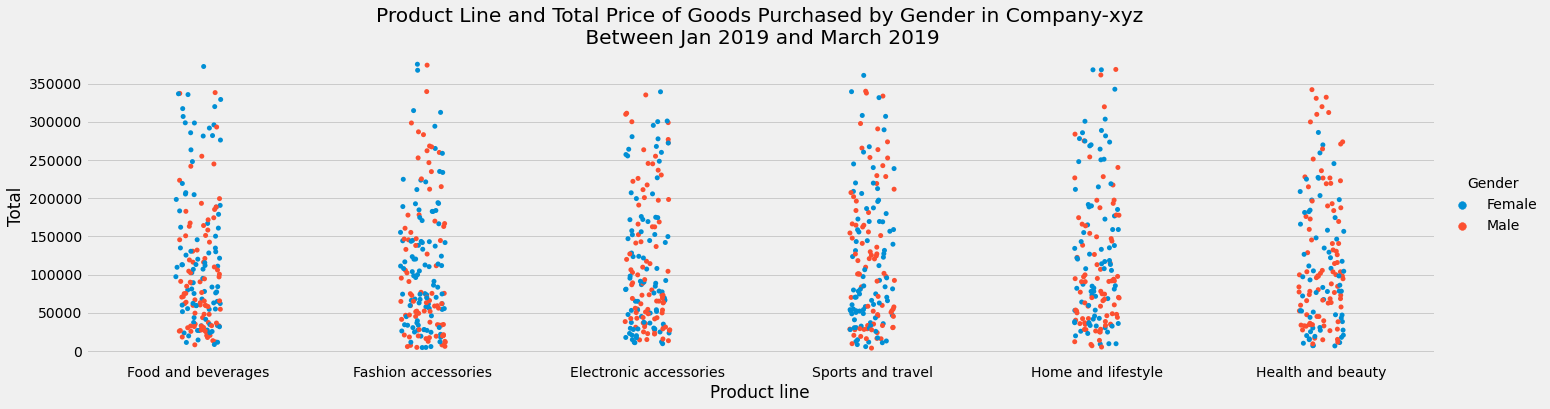

In [62]:
sns.catplot(x='Product line', y='Total', hue='Gender', aspect=4, data=df)
plt.title('Product Line and Total Price of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019')

Text(0.5, 1.0, 'Product line and Total price of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019')

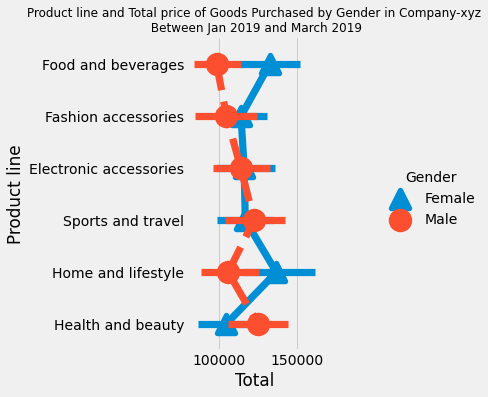

In [63]:
sns.catplot(y='Product line', x='Total', kind='point', linestyles=("-", "--"), 
            markers= ["^", "o"], hue='Gender', data=df)
plt.title('Product line and Total price of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019', 
          {'fontsize': 12})

### TO DO F - 

* I will determine the interaction between Unit Price and Quantity of goods sold by making a catplot of 
Product line per unit price and Product line per Quantity

Text(0.5, 1.0, 'Product line per Unit price of Company-xyz\nBetween Jan 2019 and March 2019')

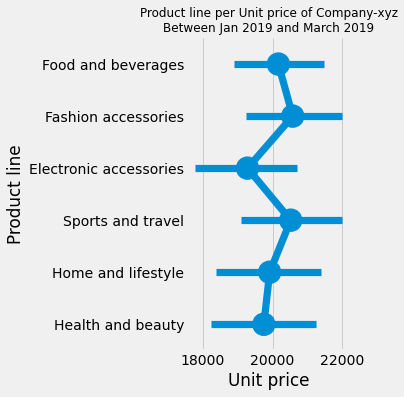

In [64]:
sns.catplot(y='Product line', x='Unit price', kind='point', data=df)
plt.title('Product line per Unit price of Company-xyz\nBetween Jan 2019 and March 2019', {'fontsize': 12})

Text(0.5, 1.0, 'Product line per Quantity of Goods Sold by Company-xyz\n Between Jan 2019 and March 2019')

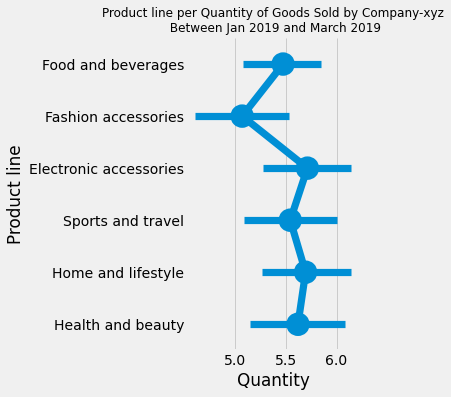

In [65]:
sns.catplot(y='Product line', x='Quantity', kind='point', data=df)
plt.title('Product line per Quantity of Goods Sold by Company-xyz\n Between Jan 2019 and March 2019', {'fontsize': 12})

### TO DO G-

* I will determine the interaction between Gender and Unit Prices of Product line sold by making a line plot of 
Product line against Unit Price and hue by gender

Text(0.5, 1.0, 'Product line per Unit Price of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019')

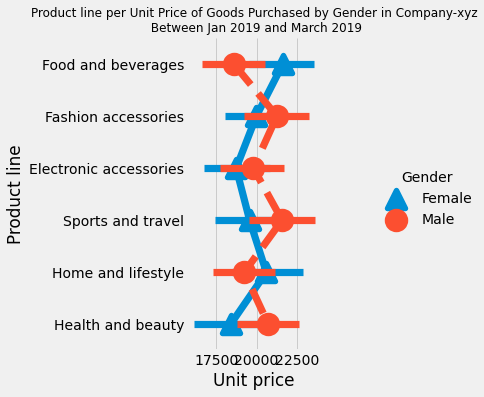

In [66]:
sns.catplot(y='Product line', x='Unit price', kind='point', linestyles=("-", "--"), 
            markers= ["^", "o"], hue='Gender', data=df)
plt.title('Product line per Unit Price of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019', 
          {'fontsize': 12})

### TO DO H-

* I will determine the interaction between Gender and Quantity of Product line sold by making a line plot of 
Product line against Quantity and hue by gender

Text(0.5, 1.0, 'Product line per Quantity of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019')

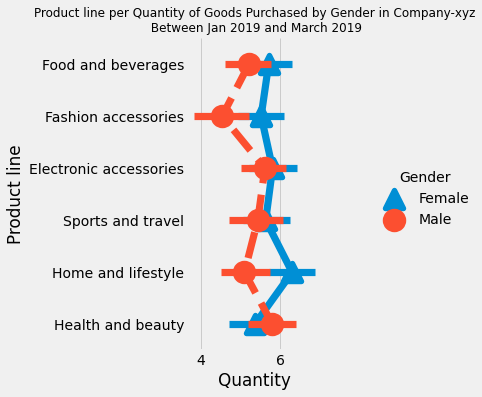

In [67]:
sns.catplot(y='Product line', x='Quantity', kind='point', linestyles=("-", "--"), 
            markers= ["^", "o"], hue='Gender', data=df)
plt.title('Product line per Quantity of Goods Purchased by Gender in Company-xyz\n Between Jan 2019 and March 2019', 
          {'fontsize': 12})

### TO DO I - 

I will determine the Interaction between Productline per unit price and Productline per unit Quantity using a Violin plot


Text(0.5, 1.0, 'Product Line and Unit Price in Branches of Company-xyz \n Between Jan 2019 and March 2019')

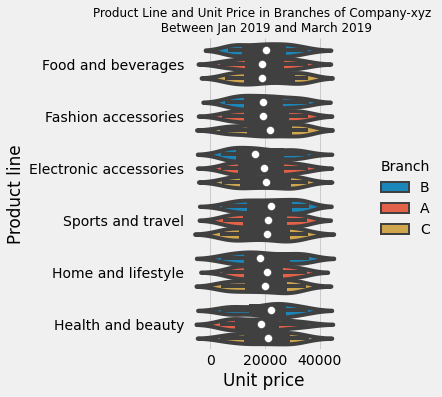

In [68]:
sns.catplot(y='Product line', x='Unit price', kind='violin', hue='Branch', data=df)
plt.title('Product Line and Unit Price in Branches of Company-xyz \n Between Jan 2019 and March 2019',
          {'fontsize':12})

Text(0.5, 1.0, 'Product Line and Quantity of Goods Purchased in Branches of Company-xyz \n Between Jan 2019 and March 2019')

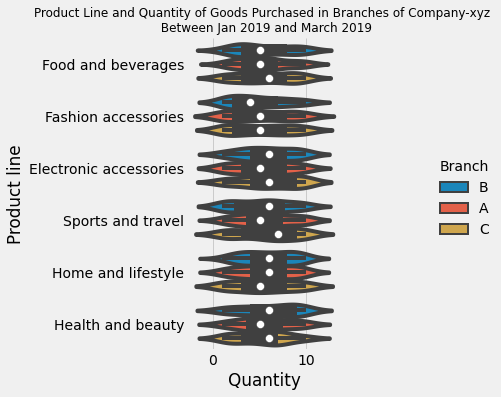

In [69]:
sns.catplot(y='Product line', x='Quantity', kind='violin', hue='Branch', data=df)
plt.title('Product Line and Quantity of Goods Purchased in Branches of Company-xyz \n Between Jan 2019 and March 2019',
          {'fontsize':12})

### TO DO J - 

I will determine the Interaction between Productline per unit price and Productline per unit Quantity for Gender using a Violin plot


Text(0.5, 1.0, 'Product line per Unit Price of Goods purchased by Gender in\n Company-xyz Between Jan 2019 and March 2019')

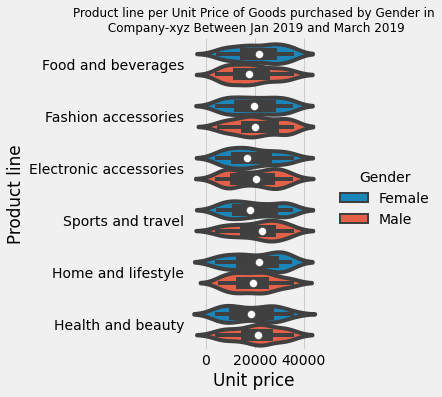

In [70]:
sns.catplot(y='Product line', x='Unit price', kind='violin', hue='Gender', data=df)
plt.title('Product line per Unit Price of Goods purchased by Gender in\n Company-xyz Between Jan 2019 and March 2019', 
         {'fontsize':12})

Text(0.5, 1.0, 'Product line per Unit Quantity of Goods purchased by Gender in\n Company-xyz Between Jan 2019 and March 2019')

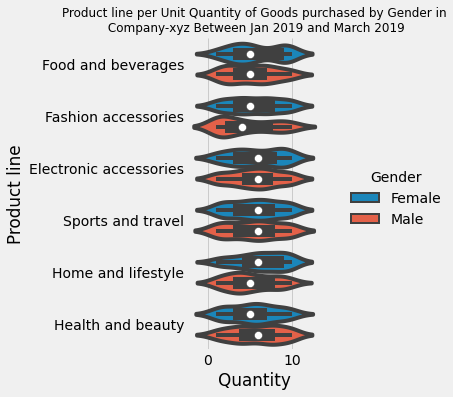

In [71]:
sns.catplot(y='Product line', x='Quantity', kind='violin', hue='Gender', data=df)
plt.title('Product line per Unit Quantity of Goods purchased by Gender in\n Company-xyz Between Jan 2019 and March 2019', 
         {'fontsize':12})

### TO DO K-

* (a.) Gross income by Product line in company-xyz

Text(0.5, 1.0, 'Gross income by Product line in Company-xyz\n Between Jan 2019 and March 2019')

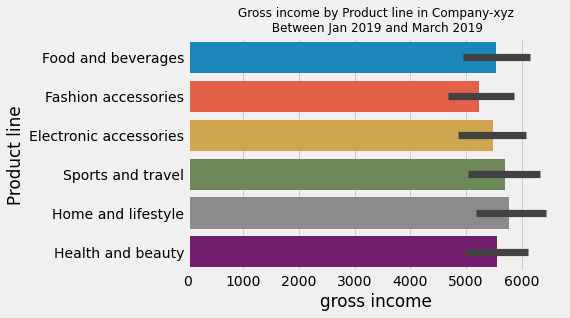

In [72]:
sns.barplot(x='gross income', y='Product line', data=df)
plt.title('Gross income by Product line in Company-xyz\n Between Jan 2019 and March 2019',
         {'fontsize':12})

*  (b.) Gross income by Product line in branches of company-xyz 

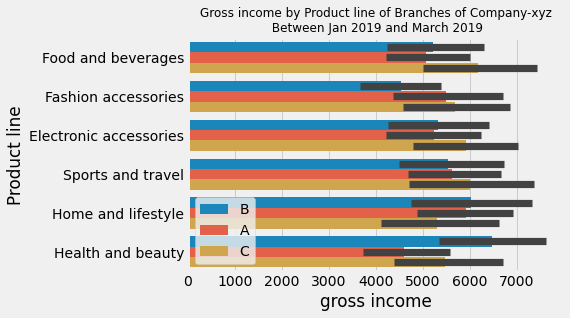

In [73]:
sns.barplot(x='gross income', hue='Branch', y='Product line', data=df)
plt.title('Gross income by Product line of Branches of Company-xyz\n Between Jan 2019 and March 2019',
         {'fontsize':12})
plt.legend(loc='lower left')

Text(0.5, 1.0, 'Gross income by Product line of Branches of Company-xyz\n Between Jan 2019 and March 2019')

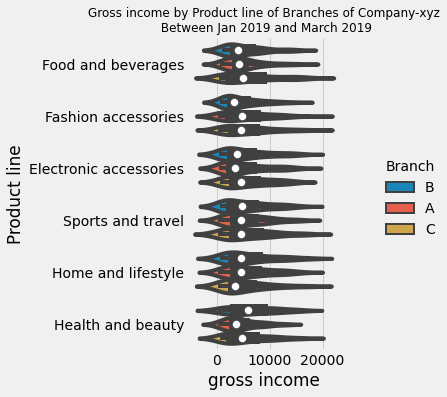

In [74]:
sns.catplot(x='gross income', hue='Branch', y='Product line', kind='violin', data=df)
plt.title('Gross income by Product line of Branches of Company-xyz\n Between Jan 2019 and March 2019',
         {'fontsize':12})

### TO DO M-
I will determine the relationship between Productline and Time of Purchase in branches of company-xyz

Text(0.5, 1.0, 'Product Line and Time of Purchase in Branches of Company-xyz\n Between Jan 2019 and March 2019')

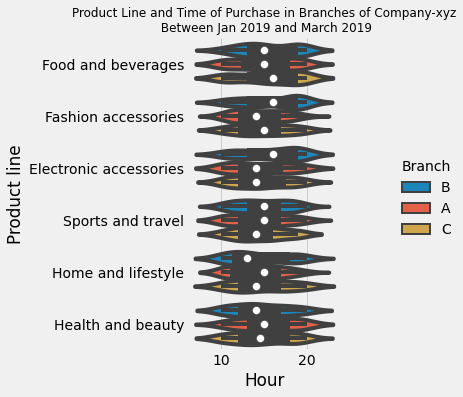

In [75]:
sns.catplot(x='Hour', y='Product line', hue='Branch', kind='violin', data=df)
plt.title('Product Line and Time of Purchase in Branches of Company-xyz\n Between Jan 2019 and March 2019', 
          {'fontsize':12})

### TO DO L -
To Determine the effect of customer type on the rating of branches of company-xyz

Text(0.5, 1.0, 'Customer Rating of Services Rendered by Branches of Company-xyz\n Between Jan 2019 and March 2019')

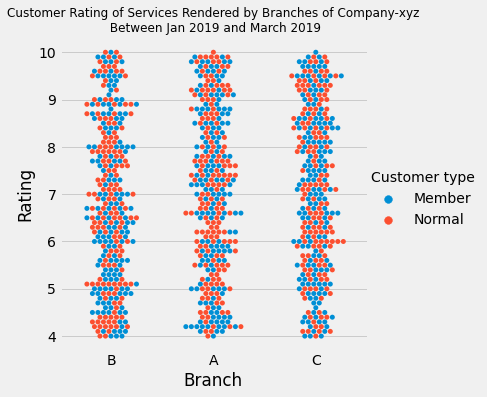

In [76]:
sns.catplot(x='Branch', y='Rating', hue='Customer type', kind='swarm', data=df)
plt.title('Customer Rating of Services Rendered by Branches of Company-xyz\n Between Jan 2019 and March 2019',
         {'fontsize':12})

### TO DO N -

Relationship Between Hour of sales and Gross income of Branches of Company-xyz

Text(0.5, 1.0, 'Gross income per Hour of Branches of Company-xyz\n Between Jan 2019 and March 2019')

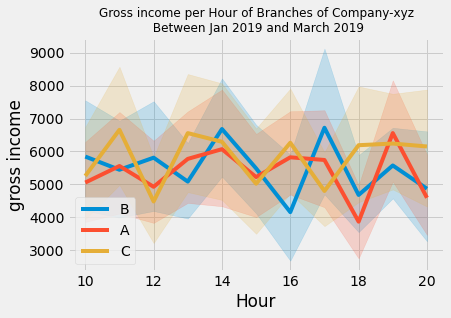

In [77]:
sns.lineplot(x='Hour', y='gross income', hue='Branch', data=df)
plt.legend(loc='lower left')
plt.title('Gross income per Hour of Branches of Company-xyz\n Between Jan 2019 and March 2019',
         {'fontsize':12})